#### Apple

In [1]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import credentials as cred

In [4]:
reddit = praw.Reddit(client_id = cred.client_id,
                     client_secret = cred.client_secret,
                     user_agent = cred.user_agent)

In [5]:
number_of_posts = 200
time_period = 'all'

subreddit = reddit.subreddit('apple').hot(limit = number_of_posts)
subreddit_comments =[]

for post in tqdm(subreddit, total = number_of_posts):
    submission = reddit.submission(id = post)
    submission.comments.replace_more(limit = 0)
    for top_level_comment in submission.comments:
        subreddit_comments.append(top_level_comment.body)

In [6]:
subreddit_comments[:10]

["Could someone please help me out? My wife is in the ICU of a hospital  and because of Covid 19 they will not let anyone visit. They do not have  phones in the rooms but the nurses there said I could use Facetime to  talk to her. She's not responding to anyone so I'm hopeful seeing me or  hearing me might trigger something. The problem is I am an  android/linux/wintel guy, what is the cheapest and quickest way for me  to facetime? Iphone? Ipad?",
 'Anyone else getting errors in Apple Music that require a full restart to get the app to even work properly? Driving me insane, says an unknown error occurred and nothing will play. Happening constantly on ios 13.3',
 'I have a question regarding my Home Screen. A few days ago, I deleted the icon for an app I use pretty commonly, but I don’t know how to get it back. Is there a way to get the icon back on my Home Screen? Preferably without using the “shortcuts” app either, since it takes a fair amount of time to launch the app',
 'iPhone 12 P

In [7]:
subreddit_comments_df = pd.DataFrame(data = {'comment': subreddit_comments})
subreddit_comments_df

,comment
0,Could someone please help me out? My wife is i...
1,Anyone else getting errors in Apple Music that...
2,I have a question regarding my Home Screen. A ...
3,iPhone 12 Pro Max Display Question\n\nHi guys ...
4,"Hi, I had question about what is happening to ..."
...,...
4145,I sure hope it's a 2018 MacBook Pro recall.
4146,"Who cares what people think, let's just wait a..."
4147,Apple buts Metro-Goldwyn-Mayer (MGM Studios) j...
4148,"Guys, I found out what is being announced!\n\n..."


In [8]:
for comment in subreddit_comments_df['comment']:
    comment_words = comment.split()
    for word in comment_words:
        word = word.strip('?:!.,;"!@()#-')
        word = word.replace("\n", "")
        print(word)
    break

Could
someone
please
help
me
out
My
wife
is
in
the
ICU
of
a
hospital
and
because
of
Covid
19
they
will
not
let
anyone
visit
They
do
not
have
phones
in
the
rooms
but
the
nurses
there
said
I
could
use
Facetime
to
talk
to
her
She's
not
responding
to
anyone
so
I'm
hopeful
seeing
me
or
hearing
me
might
trigger
something
The
problem
is
I
am
an
android/linux/wintel
guy
what
is
the
cheapest
and
quickest
way
for
me
to
facetime
Iphone
Ipad


In [9]:
sentiment_file = open("AFINN-en-165.txt", "r")
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}
scores = {}
for line in sentiment_file:
    word, score = line.split("\t")
    scores[word] = int(score)
    
sentiment_file.close()

In [10]:
counter = 0
for key, value in scores.items():
    print(key, ':', value)
    counter += 1
    if counter >= 10:
        break

abandon : -2
abandoned : -2
abandons : -2
abducted : -2
abduction : -2
abductions : -2
abhor : -3
abhorred : -3
abhorrent : -3
abhors : -3


In [11]:
for word in subreddit_comments_df['comment']:
    comment_words = word.split()
    for word in comment_words:
        word = word.strip('?:!.,;"!@()#-')
        word = word.replace("\n", "")  
        if word in scores.keys():  
            score = scores[word]  
            sentiments[str(score)] += 1

In [12]:
for sentiment_value in range(-5, 6):
    print(f"{sentiment_value} sentiment:", sentiments[str(sentiment_value)])

-5 sentiment: 2
-4 sentiment: 165
-3 sentiment: 584
-2 sentiment: 1265
-1 sentiment: 1001
0 sentiment: 0
1 sentiment: 1347
2 sentiment: 2523
3 sentiment: 907
4 sentiment: 138
5 sentiment: 0


In [13]:
comment_sentiment_df = pd.DataFrame(data={'Sentiment_Value': list(sentiments.keys()), 'Counts': list(sentiments.values())})
comment_sentiment_df['Sentiment_Value'] = comment_sentiment_df['Sentiment_Value'].astype('int')

comment_sentiment_df['Normalized_Counts'] = comment_sentiment_df['Counts'] / comment_sentiment_df['Counts'].sum()
comment_sentiment_df

,Sentiment_Value,Counts,Normalized_Counts
0,-5,2,0.000252
1,-4,165,0.020802
2,-3,584,0.073626
3,-2,1265,0.159481
4,-1,1001,0.126198
5,0,0,0.000000
6,1,1347,0.169818
7,2,2523,0.318079
8,3,907,0.114347
9,4,138,0.017398


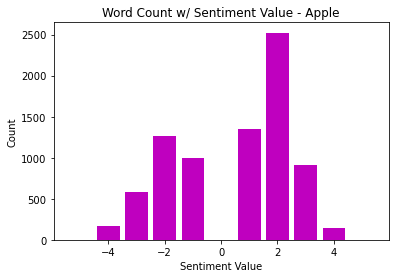

In [14]:
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='m')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Word Count w/ Sentiment Value - Apple') 
plt.show()

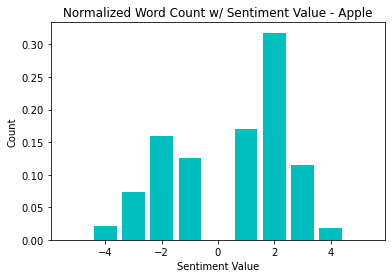

In [15]:
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='c')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Normalized Word Count w/ Sentiment Value - Apple') 
plt.show()

#### Android

In [16]:
subreddit_2 = reddit.subreddit('Android').hot(limit=number_of_posts)

subreddit_comments_2 = []

for post in tqdm(subreddit_2, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)
    for top_level_comment in submission.comments: 
        subreddit_comments_2.append(top_level_comment.body) 
        
subreddit_comments_df_2 = pd.DataFrame(data={'comment': subreddit_comments_2})

sentiments_2 = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for comment in subreddit_comments_df_2['comment']:  
    comment_words = comment.split()  
    for word in comment_words:  
        word = word.strip('?:!.,;"!@()#-')  
        word = word.replace("\n", "")  
        if word in scores.keys():  
            score = scores[word]  
            sentiments_2[str(score)] += 1  
                
comment_sentiment_df_2 = pd.DataFrame(data={'Sentiment_Value': list(sentiments_2.keys()), 'Counts': list(sentiments_2.values())})
comment_sentiment_df_2['Sentiment_Value'] = comment_sentiment_df_2['Sentiment_Value'].astype('int')

comment_sentiment_df_2['Normalized_Counts'] = comment_sentiment_df_2['Counts'] / comment_sentiment_df_2['Counts'].sum()  # Normalize the Count
comment_sentiment_df_2

,Sentiment_Value,Counts,Normalized_Counts
0,-5,3,0.000299
1,-4,254,0.025279
2,-3,789,0.078523
3,-2,1377,0.137042
4,-1,1086,0.108081
5,0,0,0.000000
6,1,1588,0.158041
7,2,3316,0.330016
8,3,1464,0.145701
9,4,168,0.016720


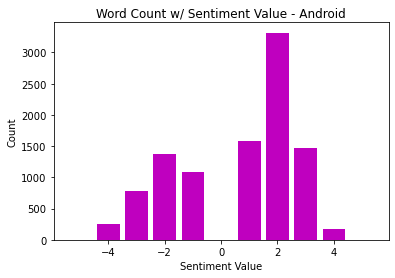

In [17]:
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Counts'], color='m')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Word Count w/ Sentiment Value - Android') 
plt.show()

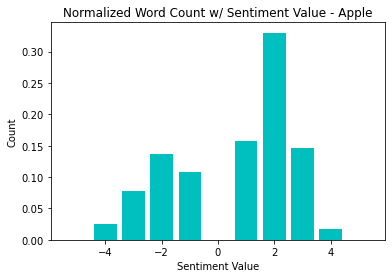

In [18]:
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Normalized_Counts'], color='c')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Normalized Word Count w/ Sentiment Value - Apple') 
plt.show()

#### Combined Plots

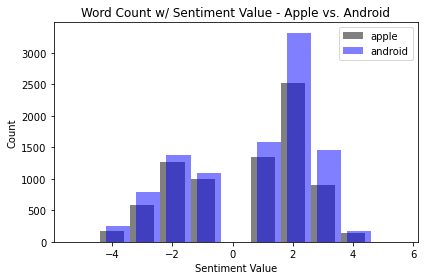

In [19]:
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='gray', label='apple')

plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Counts'], color='blue', label='android', alpha=0.5)

plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Word Count w/ Sentiment Value - Apple vs. Android')
plt.tight_layout()
plt.legend()
plt.show()

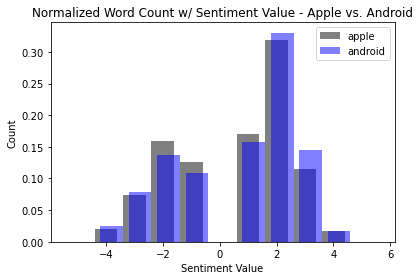

In [20]:
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='gray', label='apple')

plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Normalized_Counts'], color='blue', label='android', alpha=0.5)

plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Normalized Word Count w/ Sentiment Value - Apple vs. Android')
plt.tight_layout()
plt.legend()
plt.show()

#### Analysis

###### What is sentiment analysis?
Sentiment analysis analyzes the overall attitude/feeling of text data. It helps to determine if the text is mostly positive or negative. In this assignment, we analyzed the sentiment of each word to determine how people commenting on the Apple and Android subreddits feel about their products. Sentiment analysis can be done as a result of a survey, social media scraping, reviews, etc. It is a great way to analyze unstructured data without having to read through large masses of text. It identifies, analyzes, sorts, and assigns values/counts to data points using NLP (natural language processing) and text analytics.

###### How were you able to scrape reddit comments?
We were able to scrape reddit comments by installing praw (Python Reddit API Wrapper) - a pre-built wrapper that uses Reddit credentials (client id, client secret, user agent) to communicate with a Python script. After communication has been established, we are able to select a subreddit of our choice, and filter it by the numbner of posts, the time frame, and type of post - hot, top, new. The data (comments) are stored in a list. Scraping the reddit comments was made really easy thanks to the pre-built wrapper. Before beginning to parse and manipulate the data, the process of scraping the comments only takes about 4 lines of code:
    reddit = praw.Reddit(client_id='xxx', client_secret='xxx', user_agent='xxx')
    number_of_posts = 200
    time_period = 'all'
    subreddit = reddit.subreddit('apple').hot(limit=number_of_posts)

###### What subreddits did you analyze?
I wanted to analyze two competiters, so I chose the Apple and Android subreddits. Although not very original, there is a lot of talk about who produces the better product, so I thought it would be fun to see who was spoken about more positively. 

###### Why did you normalize the sentiment scores?
We normalized the sentiment scores so that the y-axis wasn't based on just a flat count of the number of words found in the comments. Even though the number of comments was limited to the top 200, each comment can be of varying size. By using normalized counts, we are able to get a proportion of the count of words analyzed. This is helpful when putting both the Apple and Android results on the same axis. With Apple and Android there was not too much of a change (biggest adjustment being on the -1 and 1 sentiments), but there was a difference between counts and counts / counts.sum, making the normlaized data a better representation of the comparison. 

###### What were the results of the sentiment analysis?
For the most part Apple and Addroid are fairly similar, but Android does have the more positive sentiment. Apple sentiment value counts are either equal or higher then the counts for Android when analyzing negative values, but equal or lower when analyzing the positive values. So Apple does have the most amount of negative sentiment counts, and the least amount of positive sentiment counts. For both companies, their highest word count had a sentiment value of 2. Although there is a distinction with who has the more positive sentiment among redditers, there is not a huge discrepency. The results of the two companies are not very polarizing. 
